In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import cross_val_score as cv
# sns.set()

In [2]:
import sklearn
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier

np.random.seed(1)

In [3]:
df_raw = pd.read_csv('HW2.csv')

In [4]:
df_raw.head()

,Property,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8
0,8.01,2.250000e-09,2.250000e-09,8.529104,2,580.953748,689.332068,30,0.192844
1,7.83,2.510000e-09,2.510000e-09,5.499223,3,634.183887,680.535947,50,0.382452
2,7.76,2.260000e-09,2.260000e-09,6.104465,1,624.897003,742.255910,40,0.759273
3,7.92,2.330000e-09,2.330000e-09,6.627918,2,622.276689,717.735512,40,0.801110
4,7.56,2.470000e-09,2.470000e-09,6.596712,4,647.172273,703.873167,50,0.614109


In [5]:
df_raw.describe().round(3)

,Property,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8
count,100.000,100.0,100.0,100.000,100.000,100.000,100.000,100.000,100.000
mean,7.835,0.0,0.0,6.920,2.260,623.585,709.011,41.500,0.529
std,0.191,0.0,0.0,0.936,0.895,19.118,23.837,7.961,0.284
min,7.460,0.0,0.0,5.082,1.000,579.132,639.611,20.000,0.010
25%,7.690,0.0,0.0,6.262,2.000,609.910,694.554,40.000,0.295
50%,7.825,0.0,0.0,6.882,2.000,626.266,705.899,40.000,0.533
75%,7.962,0.0,0.0,7.538,3.000,636.619,720.718,50.000,0.799
max,8.480,0.0,0.0,8.939,4.000,662.884,779.113,50.000,0.985


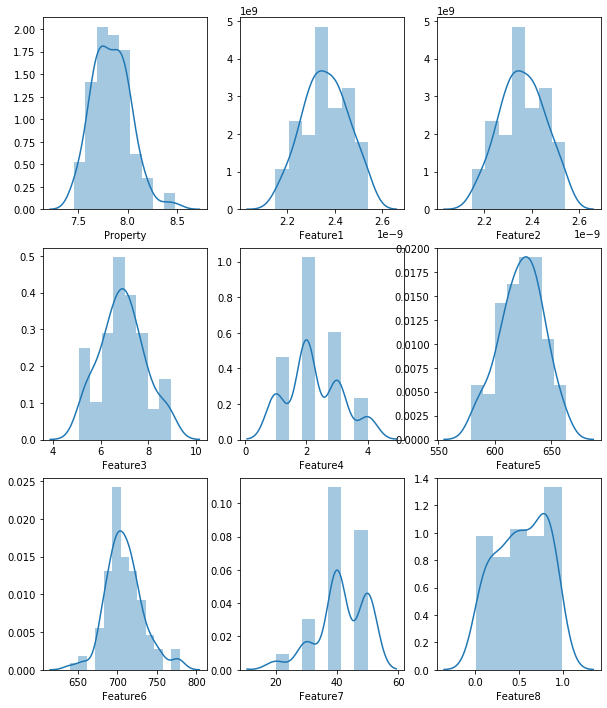

In [6]:
fig, ax = plt.subplots(3,3, figsize = (10,12))
sns.distplot(df_raw.Property, ax = ax[0,0])
sns.distplot(df_raw.Feature1, ax = ax[0,1])
sns.distplot(df_raw.Feature2, ax = ax[0,2])
sns.distplot(df_raw.Feature3, ax = ax[1,0])
sns.distplot(df_raw.Feature4, ax = ax[1,1])
sns.distplot(df_raw.Feature5, ax = ax[1,2])
sns.distplot(df_raw.Feature6, ax = ax[2,0])
sns.distplot(df_raw.Feature7, ax = ax[2,1])
sns.distplot(df_raw.Feature8, ax = ax[2,2])

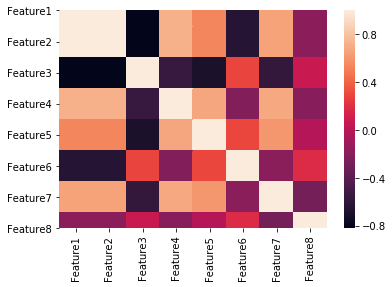

In [7]:
sns.heatmap(df_raw.iloc[:,1:].corr())

In [8]:
df_raw.Property.describe()

count    100.000000
mean       7.835000
std        0.191488
min        7.460000
25%        7.690000
50%        7.825000
75%        7.962500
max        8.480000
Name: Property, dtype: float64

In [9]:
test_idx = pd.Series(range(len(df_raw))).sample(int(len(df_raw)/4)).tolist()
train_idx = [i for i in range(len(df_raw)) if i not in test_idx]

In [10]:
X = df_raw.iloc[:,1:]
X_test = X.iloc[test_idx]
X_train = X.iloc[train_idx]

scaler = StandardScaler()
X_scaled_tr = scaler.fit_transform(X_train)
X_scaled = StandardScaler().fit_transform(X)
X_scaled_ts = scaler.transform(X_test)

y_test = df_raw.iloc[test_idx,0].values
y_train = df_raw.iloc[train_idx,0].values

# Models

### Linear Models

In [11]:
lnr_model = LinearRegression()
lnr_model.fit(X=X_scaled_tr, y = y_train)
preds_tr = lnr_model.predict(X_scaled_tr)
preds_ts = lnr_model.predict(X_scaled_ts)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.0079785190635567 0.008059453241971635
0.007645056024110238 0.006871294961252383
0.829773900696106 0.7741332045767301


In [12]:
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X=X_scaled_tr, y = y_train)
preds_tr = lasso_model.predict(X_scaled_tr)
preds_ts = lasso_model.predict(X_scaled_ts)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.016639203476910783 0.013970505671488338
0.014764472360074596 0.012542255318324083
-9.946311198123453 -10.265760010458159


In [13]:
lasso_model = Lasso(alpha = 0.01)
lasso_model.fit(X=X_scaled_tr, y = y_train)
preds_tr = lasso_model.predict(X_scaled_tr)
preds_ts = lasso_model.predict(X_scaled_ts)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.008647963725330417 0.007874107671411959
0.007678167363859573 0.005731236678325979
0.7669224612549793 0.7509080161601478


In [14]:
lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X=X_scaled_tr, y = y_train)
preds_tr = lasso_model.predict(X_scaled_tr)
preds_ts = lasso_model.predict(X_scaled_ts)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.008064434706806685 0.007787942216785342
0.007455461267203129 0.006639284771524423
0.8250825741020521 0.7847983256329947


In [15]:
EN_model = ElasticNet(alpha = 0.1, l1_ratio = 0.01)
EN_model.fit(X=X_scaled_tr, y = y_train)
preds_tr = EN_model.predict(X_scaled_tr)
preds_ts = EN_model.predict(X_scaled_ts)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.008322399670769382 0.007875540845756139
0.007865397622455394 0.00676471654703735
0.7888050538558194 0.7539592243980251


In [16]:
EN_model = ElasticNet(alpha = 0.01, l1_ratio = 0.15)
EN_model.fit(X=X_scaled_tr, y = y_train)
preds_tr = EN_model.predict(X_scaled_tr)
preds_ts = EN_model.predict(X_scaled_ts)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.008117357096603555 0.007768899214306124
0.007743765557876689 0.006635551989858338
0.8201155556319999 0.7821767380218703


In [17]:
EN_model = ElasticNet(alpha = 0.001, l1_ratio = 0.7)
EN_model.fit(X=X_scaled_tr, y = y_train)
preds_tr = EN_model.predict(X_scaled_tr)
preds_ts = EN_model.predict(X_scaled_ts)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.008053663979076324 0.007809212206200561
0.007265435729205551 0.00667235364102845
0.8262369507643464 0.7847665144473303


In [18]:
Ridge_model = Ridge(alpha = .5)
Ridge_model.fit(X=X_scaled_tr, y = y_train)
preds_tr = Ridge_model.predict(X_scaled_tr)
preds_ts = Ridge_model.predict(X_scaled_ts)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.008019829423898462 0.00791885457299292
0.007343572670551964 0.0066307427316991685
0.8276980198928494 0.7794743454046094


In [19]:
Ridge_model = Ridge(alpha = .075)
Ridge_model.fit(X=X_scaled_tr, y = y_train)
preds_tr = Ridge_model.predict(X_scaled_tr)
preds_ts = Ridge_model.predict(X_scaled_ts)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.007991881537346297 0.007999441079802633
0.00748587216627688 0.006818835828603209
0.8294280218590195 0.7770606857102468


### Support Vector Machines

In [20]:
svr_model_lin = SVR(kernel = 'linear')
svr_model_lin.fit(X = X_scaled_tr, y = y_train)
preds_tr = svr_model_lin.predict(X_scaled_tr)
preds_ts = svr_model_lin.predict(X_scaled_ts)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.008255156961440847 0.007998473679921706
0.008056384073889807 0.00597044670016705
0.8220557166666507 0.7734261877414617


In [21]:
svr_model_rbf = SVR(kernel = 'rbf')
svr_model_rbf.fit(X = X_scaled_tr, y = y_train)
preds_tr = svr_model_rbf.predict(X_scaled_tr)
preds_ts = svr_model_rbf.predict(X_scaled_ts)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.00798112466530462 0.007494564588441891
0.008998481409319371 0.006619977399299047
0.8254650328739557 0.7716148302869263


In [22]:
svr_model_rbf = SVR(kernel = 'rbf', C = .1)
svr_model_rbf.fit(X = X_scaled_tr, y = y_train)
preds_tr = svr_model_rbf.predict(X_scaled_tr)
preds_ts = svr_model_rbf.predict(X_scaled_ts)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.009414943599181427 0.008544158843500621
0.009097019037372575 0.008493314096167876
0.5285517216074098 0.6030068152213346


In [23]:
svr_model_poly = SVR(kernel = 'poly', degree=3)
svr_model_poly.fit(X = X_scaled_tr, y = y_train)
preds_tr = svr_model_poly.predict(X_scaled_tr)
preds_ts = svr_model_poly.predict(X_scaled_ts)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.009097430848171289 0.008620240269215129
0.009377151250334585 0.007252730437979873
0.801039661984502 0.5619248175623233


In [24]:
svr_model_poly = SVR(kernel = 'poly', degree=2)
svr_model_poly.fit(X = X_scaled_tr, y = y_train)
preds_tr = svr_model_poly.predict(X_scaled_tr)
preds_ts = svr_model_poly.predict(X_scaled_ts)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.012170395936760649 0.013360153144243951
0.01269116341407191 0.011889242961470243
0.4589510312320886 -0.5370268343285578


In [25]:
svr_model_poly = SVR(kernel = 'poly', degree=4)
svr_model_poly.fit(X = X_scaled_tr, y = y_train)
preds_tr = svr_model_poly.predict(X_scaled_tr)
preds_ts = svr_model_poly.predict(X_scaled_ts)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.011606930987151482 0.014115234479029676
0.012445047659246158 0.011939309916365989
0.6537665966646703 -2.510021787180498


In [26]:
svr_model_sigmoid = SVR(kernel = 'sigmoid')
svr_model_sigmoid.fit(X = X_scaled_tr, y = y_train)
preds_tr = svr_model_sigmoid.predict(X_scaled_tr)
preds_ts = svr_model_sigmoid.predict(X_scaled_ts)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.15633258854837875 0.16159077827000942
0.11297110287732592 0.14913613077975207
0.006431387206758177 -0.4284591391483019


### GPR

In [27]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=3)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_scaled_tr, y_train)

# Make the prediction on the meshed x-axis (ask for MSE as well)
preds_ts, sigma_ts = gp.predict(X_scaled_ts, return_std=True)
preds_tr, sigma_tr = gp.predict(X_scaled_tr, return_std=True)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

2.6914458779355795e-10 0.019477081748654975
1.0343437506210872e-10 0.015814597059761983
0.9999999999999997 0.4381948536939746


In [28]:
kernel = RBF()
gp = GaussianProcessRegressor(kernel=kernel)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_scaled_tr, y_train)

# Make the prediction on the meshed x-axis (ask for MSE as well)
preds_ts, sigma_ts = gp.predict(X_scaled_ts, return_std=True)
preds_tr, sigma_tr = gp.predict(X_scaled_tr, return_std=True)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

4.982493971916129e-10 0.021913214730629686
2.0316575282270627e-10 0.015662394457393935
0.9999999999999989 -0.26026708159207645


### Tree Based Models

In [29]:
rf = RandomForestRegressor()
rf.fit(X = X_scaled_tr, y = y_train)
preds_tr = rf.predict(X_scaled_tr)
preds_ts = rf.predict(X_scaled_ts)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.0029395408858527445 0.006508375855799301
0.0024250000000002325 0.005234474017743263
0.9740482234039526 0.8060599615271367


<BarContainer object of 8 artists>

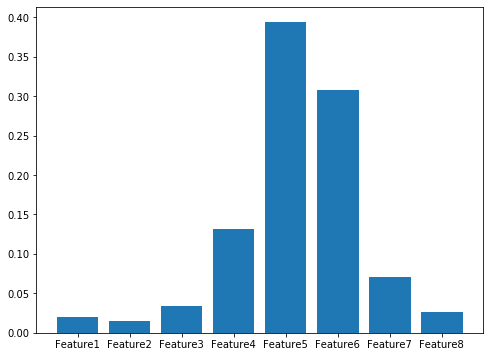

In [31]:
plt.figure(figsize=(8,6))
plt.bar(x = df_raw.columns[1:],height=rf.feature_importances_)

# Classification

In [33]:
df_raw.Property.describe()

count    100.000000
mean       7.835000
std        0.191488
min        7.460000
25%        7.690000
50%        7.825000
75%        7.962500
max        8.480000
Name: Property, dtype: float64

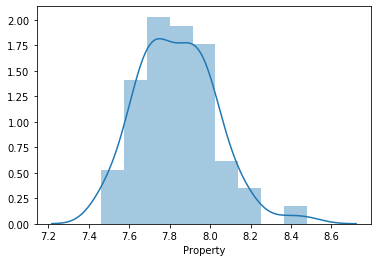

In [34]:
sns.distplot(df_raw.Property)

In [35]:
y_cat = (df_raw.Property > df_raw.Property.median()).astype(int)

In [36]:
y_cat_tr = y_cat[train_idx]
y_cat_ts = y_cat[test_idx]

### Accuracy Score

In [37]:
asc = sklearn.metrics.make_scorer(accuracy_score)

### DecisionTree

In [38]:
dtc = DecisionTreeClassifier()
dtc.fit(X_scaled_tr, y_cat_tr)
accuracy_score(dtc.predict(X_scaled_ts), y_cat_ts)

0.8

In [39]:
dtc = DecisionTreeClassifier(max_depth = 3)
dtc.fit(X_scaled_tr, y_cat_tr)
accuracy_score(dtc.predict(X_scaled_ts), y_cat_ts)

0.72

In [40]:
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_scaled_tr, y_cat_tr)
accuracy_score(dtc.predict(X_scaled_ts), y_cat_ts)

0.84

In [41]:
dtc = DecisionTreeClassifier(max_depth = 5, min_samples_split = 3)
dtc.fit(X_scaled_tr, y_cat_tr)
accuracy_score(dtc.predict(X_scaled_ts), y_cat_ts)

0.84

In [42]:
dtc = DecisionTreeClassifier(max_depth = 5, min_samples_split = 5)
dtc.fit(X_scaled_tr, y_cat_tr)
accuracy_score(dtc.predict(X_scaled_ts), y_cat_ts)

0.8

In [43]:
dtc = DecisionTreeClassifier(max_depth = 5,
                             min_samples_split = 5,
                             min_samples_leaf=2)
dtc.fit(X_scaled_tr, y_cat_tr)
accuracy_score(dtc.predict(X_scaled_ts), y_cat_ts)

0.84

In [44]:
dtc = DecisionTreeClassifier(max_depth = 5,
                             min_samples_split = 5,
                             min_samples_leaf=6)
dtc.fit(X_scaled_tr, y_cat_tr)
accuracy_score(dtc.predict(X_scaled_ts), y_cat_ts)

0.76

In [45]:
dtc = DecisionTreeClassifier(max_depth = 5,
                             min_samples_split = 5,
                             min_samples_leaf=10)
dtc.fit(X_scaled_tr, y_cat_tr)
accuracy_score(dtc.predict(X_scaled_ts), y_cat_ts)

0.68

### Random Forest

In [46]:
mdl = RandomForestClassifier()
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.84

In [47]:
n_estimators max_features min_samples_leaf

SyntaxError: invalid syntax (<ipython-input-47-366a7b00b090>, line 1)

In [56]:
mdl = RandomForestClassifier(n_estimators=200)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.84

In [49]:
mdl = RandomForestClassifier(n_estimators=40)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.84

In [50]:
mdl = RandomForestClassifier(max_features = 2)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.8

In [51]:
mdl = RandomForestClassifier(max_features = 7)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.84

In [52]:
mdl = RandomForestClassifier(n_estimators=3, max_features=2)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.76

In [53]:
mdl = RandomForestClassifier(n_estimators=3,
                             max_features=2,
                             min_samples_leaf=3)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.76

In [54]:
mdl = RandomForestClassifier(n_estimators=3,
                             max_features=2,
                             min_samples_leaf=5)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.84

<BarContainer object of 8 artists>

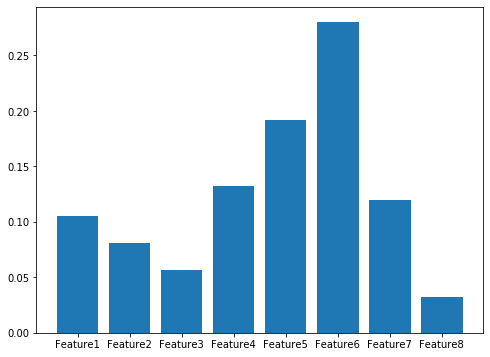

In [57]:
plt.figure(figsize=(8,6))
plt.bar(x = df_raw.columns[1:],height=mdl.feature_importances_)


### Boosting

In [191]:
mdl = GradientBoostingClassifier()
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.8

In [ ]:
n_estimators max_features min_samples_leaf

In [192]:
mdl = GradientBoostingClassifier(n_estimators=200)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.8

In [193]:
mdl = GradientBoostingClassifier(n_estimators=40)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.84

In [194]:
mdl = GradientBoostingClassifier(max_features = 2)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.84

In [195]:
mdl = GradientBoostingClassifier(max_features = 7)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.84

In [196]:
mdl = GradientBoostingClassifier(n_estimators=3, max_features=2)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.8

In [197]:
mdl = GradientBoostingClassifier(n_estimators=3,
                             max_features=2,
                             min_samples_leaf=3)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.8

In [198]:
mdl = GradientBoostingClassifier(n_estimators=3,
                             max_features=2,
                             min_samples_leaf=5)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.72

### Bagging

In [204]:
mdl = BaggingClassifier()
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.84

In [205]:
# n_estimators max_features max_samples

In [206]:
mdl = BaggingClassifier(n_estimators=200)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.84

In [207]:
mdl = BaggingClassifier(n_estimators=40)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.84

In [208]:
mdl = BaggingClassifier(max_features = 2)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.72

In [209]:
mdl = BaggingClassifier(max_features = 7)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.8

In [210]:
mdl = BaggingClassifier(n_estimators=3, max_features=2)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.8

In [211]:
mdl = BaggingClassifier(n_estimators=3,
                             max_features=2,
                             max_samples=.333)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.52

In [212]:
mdl = BaggingClassifier(n_estimators=3,
                             max_features=2,
                             max_samples=.5)
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.76

In [200]:
mdl = BaggingClassifier()
mdl.fit(X_scaled_tr, y_cat_tr)
accuracy_score(mdl.predict(X_scaled_ts), y_cat_ts)

0.84

In [76]:
mdl.feature_importances_

array([0.08664689, 0.10966213, 0.07495141, 0.14545604, 0.16673318,
       0.25275189, 0.11366631, 0.05013216])

In [ ]:
n_estimators, min_samples_leaf, 